# Logistic Regression

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('../../Data/titanic_train.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Explore the Data

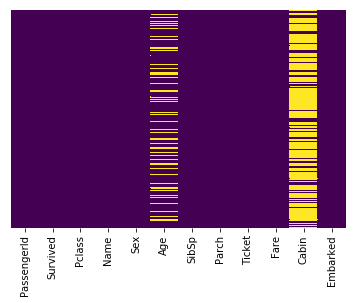

In [5]:
sns.heatmap( train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

Since Age is only mossng around 20% of the data we could probably make implacations for the missing data. Since Cabin is missing most of the data it would be best to drop that column altogether or turn it into a binary variable (known? 1 or 0).

In [8]:
sns.set_style('darkgrid')

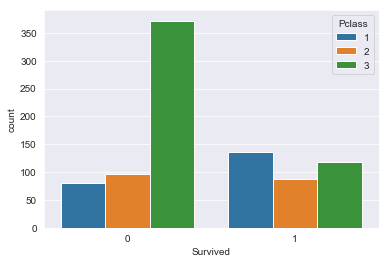

In [12]:
sns. countplot(x = 'Survived', hue = 'Pclass', data = train)

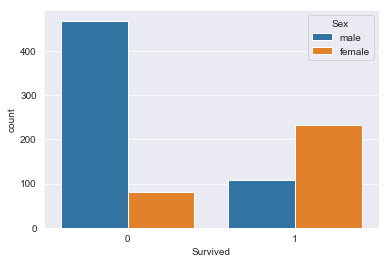

In [24]:
sns. countplot(x = 'Survived', hue = 'Sex', data = train)

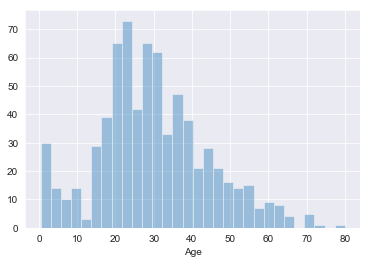

In [13]:
sns.distplot( train['Age'].dropna(), kde = False, bins = 30 )

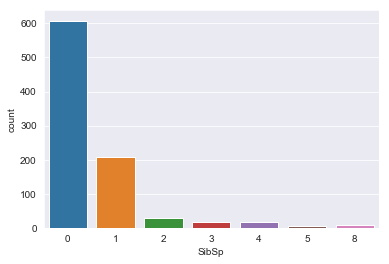

In [15]:
sns.countplot( x = 'SibSp', data = train )

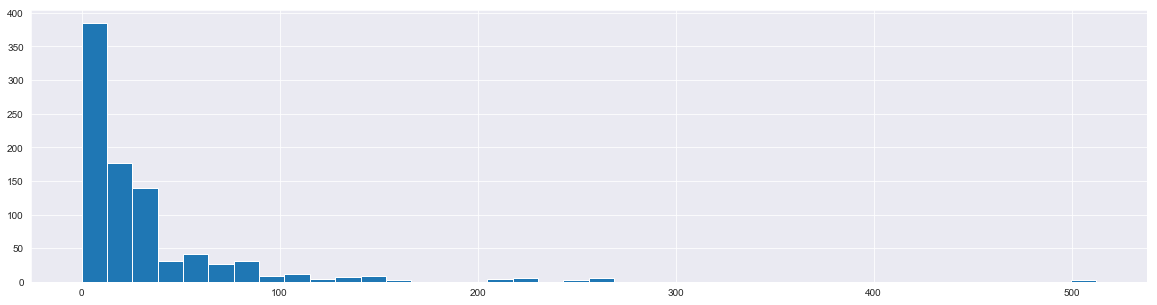

In [23]:
train['Fare'].hist( bins = 40, figsize = (20, 5) )

## Clean Data (Remove missing or fill default for missing)

Imputation: for the missing data in the Age column, just fill in missing values with the mean value for that variable. One thing to make this better (and if there are categorical variables) is to find the mean value of a variable for all variables given a specific class label within another variable. 

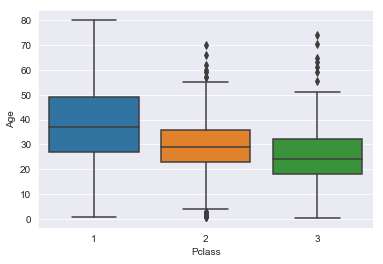

In [25]:
sns.boxplot( x = 'Pclass', y = 'Age', data = train )

In [27]:
def impute_age(cols):
    age     = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return 37
        elif p_class == 2:
            return 29
        else:
            return 24
    else:
        return age

In [29]:
train['Age'] = train[ ['Age', 'Pclass'] ].apply( impute_age, axis = 1 )

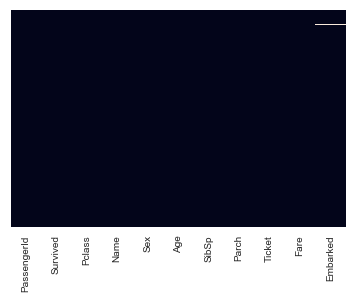

In [32]:
sns.heatmap( train.isnull(), yticklabels = False, cbar = False )

In [31]:
train.drop( 'Cabin', axis = 1, inplace = True )

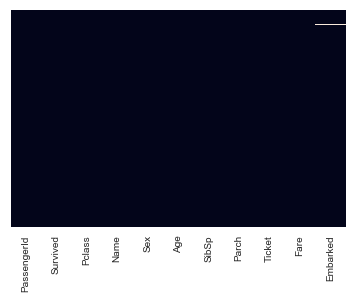

In [33]:
sns.heatmap( train.isnull(), yticklabels = False, cbar = False )

In [34]:
train.dropna( inplace = True )

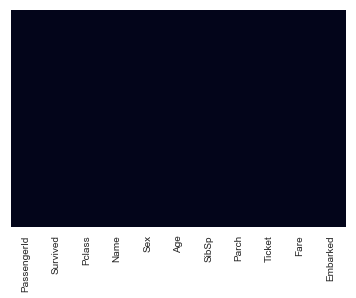

In [35]:
sns.heatmap( train.isnull(), yticklabels = False, cbar = False )

## Add Dummy Variables

In [40]:
# Convert column to dummy variables
sex    = pd.get_dummies( train['Sex'], drop_first = True )
embark = pd.get_dummies( train['Embarked'], drop_first = True )

Drop_first = True will drop the first column. Doing this makes it so the algorithm cannot perfectly predict the classification. If Male and Female, if the algorithm saw Male = 1, then it could perfectly predict Female = 0.

In [41]:
train = pd.concat( [train, sex, embark], axis = 1 )

In [47]:
train.drop( ['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True )

In [48]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

## Logistic Regression

####  Documentation

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.

###### Parameters
- Penalty: str, L1, L2 (default is L2)
- dual: prefer dual = False when n_samples > n_features
- tol: tolerance for stopping criteria. Default is 1e-4.
- fit_intercept: specifies if constant should be added to decision function.
- class_weight: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
- random_state( ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ ): sets the seed.
- solver: algorithm to use in the optimization problem. 
    - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
    - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
    - ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.
- max_iter: Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge.
- multi_class( ‘ovr’, ‘multinomial’, ‘auto’ ): If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
- n_jobs: Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not.

###### Attributes
- classes_: number of classes known to the classifier.
- coef_: coefficient of the features in the decision function.
- intercept_: intercept added to the decision function.
- n_iter_: Actual number of iterations for all classes. If binary or multinomial, it returns only 1 element. For liblinear solver, only the maximum number of iteration across all classes is given.

###### Methods
- decision_function(X): Predict confidence scores for samples. The confidence score for a sample is the signed distance of that sample to the hyperplane.
- densify(): Convert coefficient matrix to dense array format.
- fit(X, y[, sample_weight]): Fit the model according to the given training data.
- get_params([deep]): Get parameters for this estimator.
- predict(X): Predict class labels for samples in X.
- predict_log_proba(X): Log of probability estimates. The returned estimates for all classes are ordered by the label of classes.
- predict_proba(X): Probability estimates. The returned estimates for all classes are ordered by the label of classes.
- score(X, y[, sample_weight]): Returns the mean accuracy on the given test data and labels.
- set_params(params): Set the parameters of this estimator.
- sparsify(): Convert coefficient matrix to sparse format.

In [54]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 101 )

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression()

In [58]:
logmodel.fit( X_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
predictions = logmodel.predict( X_test )

In [60]:
from sklearn.metrics import classification_report

In [61]:
print( classification_report( y_test, predictions ) )

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix( y_test, predictions )

array([[148,  15],
       [ 36,  68]], dtype=int64)